In [35]:
# KNN으로 포지션 예측하기

In [36]:
# Random값을 정하기
import numpy as np
np.random.seed(5)

In [37]:
import pandas as pd

In [38]:
train = pd.read_csv("../Data/basketball_train.csv")
test= pd.read_csv("../Data/basketball_test.csv")

In [39]:
print(train.shape) # 행,열 갯수 확인
print(train.count()) # 갯수 확인
print(train.isnull().sum()) # null확인

(80, 5)
Player    80
Pos       80
3P        80
TRB       80
BLK       80
dtype: int64
Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64


In [40]:
print(test.shape) # 행,열 갯수 확인
print(test.count()) # 갯수 확인
print(test.isnull().sum()) # null확인

(20, 5)
Player    20
Pos       20
3P        20
TRB       20
BLK       20
dtype: int64
Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64


---
### 최적의 k 찾기 (교차검증 - corss validation)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score # 교차검증

In [42]:
# 최적의 k를 찾기 위해 교차 검증을 수행할 k의 점위를 3부터 학습데이터의 절반까지 지정
max_k_range =train.shape[0] // 2 # 몫, 정수형으로 구하기 
max_k_range

40

In [43]:
# 최적의 k를 찾기 위한 범위 확인
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)

k_list

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [44]:
# 점수 저장 및 Train Data 정의
cross_validation_scores = []
x_train = train[['3P','BLK','TRB']]
y_train = train['Pos']

print(x_train.head())
print(y_train.head())

    3P  BLK  TRB
0  2.9  0.3  3.1
1  1.3  0.4  2.8
2  2.4  0.1  2.1
3  1.7  0.3  2.9
4  1.6  0.4  5.9
0    SG
1    SG
2    SG
3    SG
4    SG
Name: Pos, dtype: object


---
### 교차검증 (10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장

In [45]:
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores =cross_val_score(
        knn, # 모델이름 적기 randomforest 등...
        x_train,
        y_train,
        cv =10, # cross validation (교차검증 횟수)
        scoring='accuracy'
    )# 10번 돌린다
    cross_validation_scores.append(scores.mean())

cross_validation_scores
# 밑으로 내려갈수록 떨어진다.

[0.9125,
 0.8875,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9,
 0.9,
 0.9,
 0.8875,
 0.8625,
 0.8625,
 0.85,
 0.8125,
 0.8125,
 0.8125,
 0.8,
 0.7875]

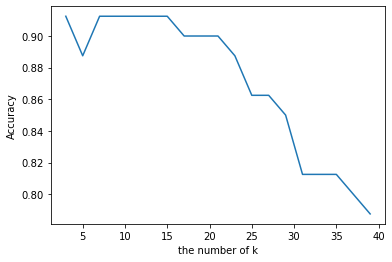

In [46]:
# k에 따른 정확도를 시각화
import matplotlib.pyplot as plt

plt.plot(k_list,cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [47]:
# 가장 예측율이 높은 k를 선정
cvs = cross_validation_scores
k= k_list[cvs.index(max(cross_validation_scores))]
print('The best number of k is', k)

The best number of k is 3


---
### 2개의 특징으로 예측하기 (3점슛, 블로킹)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier(n_neighbors=k)

In [50]:
# 학습에 사용할 features
x_train =train[['3P', 'BLK']]

In [51]:
# 학습에 사용할 target
y_train = train['Pos']

In [52]:
# 학습시키기
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
# 검증에 사용할 features
x_test = test[['3P','BLK']]

In [54]:
# 검증의 정답
y_test = test['Pos']

In [55]:
knn.score(x_test ,y_test)

0.95

In [56]:
# 예측
pred = knn.predict(x_test)
pred

array(['C', 'C', 'SG', 'C', 'SG', 'SG', 'SG', 'C', 'C', 'C', 'SG', 'C',
       'C', 'SG', 'C', 'SG', 'SG', 'C', 'SG', 'C'], dtype=object)

In [57]:
# 실제값과 예측값의 비교
comparison = pd.DataFrame(
    {'예측값': pred,
    '정답': y_test
    }
)
comparison.head()

,예측값,정답
0,C,C
1,C,C
2,SG,SG
3,C,C
4,SG,C


---
### Confusion matrix

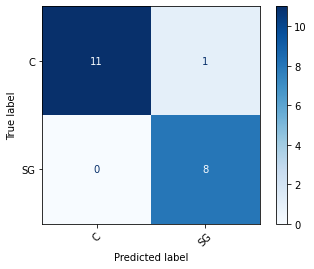

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix1 = confusion_matrix(y_test, pred)
target_names = ['C','SG']
disp =ConfusionMatrixDisplay(
    confusion_matrix= confusion_matrix1,
    display_labels=target_names
)
disp.plot(
    cmap=plt.cm.Blues, # 색깔
    xticks_rotation=45,
)
plt.show()


---
### 3개의 특징(컬럼이름)으로 예측하기 (3점슛, 블로킹, 리바운드)

In [59]:
# 학습에 사용할 features
x_train =train[['3P', 'BLK', 'TRB']]

In [60]:
# 학습에 사용할 target
y_train = train['Pos']

In [62]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [63]:
# 검증
x_test = test[['3P', 'BLK',"TRB"]]

In [64]:
y_test = test['Pos']

In [65]:
knn.score(x_test,y_test)

0.8

In [67]:
pred = knn.predict(x_test)
pred

array(['SG', 'C', 'SG', 'C', 'SG', 'C', 'SG', 'C', 'C', 'C', 'SG', 'C',
       'C', 'SG', 'C', 'SG', 'C', 'C', 'SG', 'C'], dtype=object)

In [68]:
# 실제값과 예측값의 비교
comparison = pd.DataFrame(
    {'예측값': pred,
    '정답': y_test
    }
)
comparison.head()

,예측값,정답
0,SG,C
1,C,C
2,SG,SG
3,C,C
4,SG,C


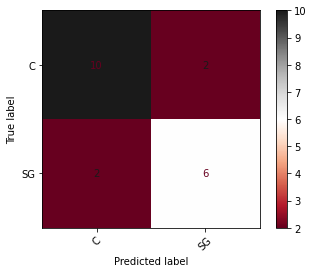

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix1 = confusion_matrix(y_test, pred)
target_names = ['C','SG']
disp =ConfusionMatrixDisplay(
    confusion_matrix= confusion_matrix1,
    display_labels=target_names
)
disp.plot(
    cmap=plt.cm.RdGy, # 색깔
    xticks_rotation=45,
)
plt.show()

3P : 3.4    
BLK: 0.5    
TRB: 3.7    
일 경우에는 ?    

In [76]:
knn.predict([[3.4,0.5,3.7]])[0]
# SG가 어울린다.

'SG'